# 1. DATAPROCESSING

In [100]:
input = "Brack Obama is a prime minister of USA in the year of 2015. NARENDRA MODI is the prime minister of INDIA"
print(input)

Brack Obama is a prime minister of USA in the year of 2015. NARENDRA MODI is the prime minister of INDIA


In [101]:
#(1)lowercase
lowercase = input.lower()
print("LOWERCSE = ", lowercase)

#re
#pip install re
import re
lowercase_re = re.sub('2015', '2025', lowercase)
print("REGULAR EXP1 = ", lowercase_re)
lowercase_re = re.sub('[a-m]', '*', lowercase)
print("REGULAR EXP2 = ", lowercase_re)
lowercase_re = re.sub('/d', '-', lowercase)
print("REGULAR EXP3 = ", lowercase_re)

LOWERCSE =  brack obama is a prime minister of usa in the year of 2015. narendra modi is the prime minister of india
REGULAR EXP1 =  brack obama is a prime minister of usa in the year of 2025. narendra modi is the prime minister of india
REGULAR EXP2 =  *r*** o**** *s * pr*** **n*st*r o* us* *n t** y**r o* 2015. n*r*n*r* *o** *s t** pr*** **n*st*r o* *n***
REGULAR EXP3 =  brack obama is a prime minister of usa in the year of 2015. narendra modi is the prime minister of india


In [102]:
#(2)Tokenization
import nltk
from nltk import word_tokenize, sent_tokenize

word_tokens = word_tokenize(input)
print("WORD TOKENS = ", word_tokens)
print(len(word_tokens))
sent_tokens = sent_tokenize(input)
print("SENT TOKENS = ", sent_tokens)
print(len(sent_tokens))

WORD TOKENS =  ['Brack', 'Obama', 'is', 'a', 'prime', 'minister', 'of', 'USA', 'in', 'the', 'year', 'of', '2015', '.', 'NARENDRA', 'MODI', 'is', 'the', 'prime', 'minister', 'of', 'INDIA']
22
SENT TOKENS =  ['Brack Obama is a prime minister of USA in the year of 2015.', 'NARENDRA MODI is the prime minister of INDIA']
2


In [103]:
#(3)stopwords Removal
from nltk.corpus import stopwords
#print(stopwords.fileids())
stopwords = set(stopwords.words('english'))
#print("\n", stopwords)

tokens_stopwords = []
for token in word_tokens:
    if token not in stopwords:
        tokens_stopwords.append(token)
print(' '.join(tokens_stopwords))

Brack Obama prime minister USA year 2015 . NARENDRA MODI prime minister INDIA


In [104]:
#Stemmer
stemming = []
from nltk import PorterStemmer
for word in tokens_stopwords:
    stemming.append(PorterStemmer().stem(word))
print(stemming)

['brack', 'obama', 'prime', 'minist', 'usa', 'year', '2015', '.', 'narendra', 'modi', 'prime', 'minist', 'india']


In [105]:
#Lemmatizer
from nltk import WordNetLemmatizer
lma = []
for word in tokens_stopwords:
    lma.append(WordNetLemmatizer().lemmatize(word))
print(lma)

['Brack', 'Obama', 'prime', 'minister', 'USA', 'year', '2015', '.', 'NARENDRA', 'MODI', 'prime', 'minister', 'INDIA']


In [106]:
#POS Tags
from nltk import pos_tag
print(pos_tag(word_tokens))

[('Brack', 'NNP'), ('Obama', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('USA', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('year', 'NN'), ('of', 'IN'), ('2015', 'CD'), ('.', '.'), ('NARENDRA', 'NNP'), ('MODI', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('INDIA', 'NNP')]


# 2. NER

In [107]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

input = "Brack Obama is a prime minister of USA in the year of 2015. NARENDRA MODI is the prime minister of INDIA"
ner = ne_chunk(pos_tag(word_tokenize(input)))
#print(ner)
from nltk.tree import Tree
named_entity = []
for subtree in ner:
    if isinstance(subtree, Tree):
        entity = "".join([token for token, pos in subtree.leaves()])
        named_entity.append(entity)
        print(named_entity)

['Brack']
['Brack', 'Obama']
['Brack', 'Obama', 'USA']
['Brack', 'Obama', 'USA', 'NARENDRA']
['Brack', 'Obama', 'USA', 'NARENDRA', 'INDIA']


# 3. NER USING SPACY

In [108]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Barack Obama went as a prime minister of USA in the year of 2015.PM MODI is the prime minister of INDIA."
doc = nlp(text)
named_entity = []
for ent in doc.ents:
    named_entity.append(ent.text)
    print(named_entity)

['Barack Obama']
['Barack Obama', 'USA']
['Barack Obama', 'USA', 'the year']
['Barack Obama', 'USA', 'the year', '2015.PM MODI']
['Barack Obama', 'USA', 'the year', '2015.PM MODI', 'INDIA']


# 4. PREDICTIVE ANALYSIS

In [109]:
# TF-IDF
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
vector = TfidfVectorizer()

documents= [ "apple boy cat", "apple cat dog", "dog egg fan" ]

preprocessed = []
for doc in documents:
    tokenization = word_tokenize(doc)
    stop = [ps.stem(word) for word in tokenization if word not in stopwords]
    preprocessed.append(" ".join(stop))
print(preprocessed)
word_score = vector.fit_transform(preprocessed)
print(word_score)

['appl boy cat', 'appl cat dog', 'dog egg fan']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (3, 6)>
  Coords	Values
  (0, 0)	0.5178561161676974
  (0, 1)	0.680918560398684
  (0, 2)	0.5178561161676974
  (1, 0)	0.5773502691896257
  (1, 2)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 3)	0.4736296010332684
  (2, 4)	0.6227660078332259
  (2, 5)	0.6227660078332259


# 5. SIMPLE LINEAR REGRESSION

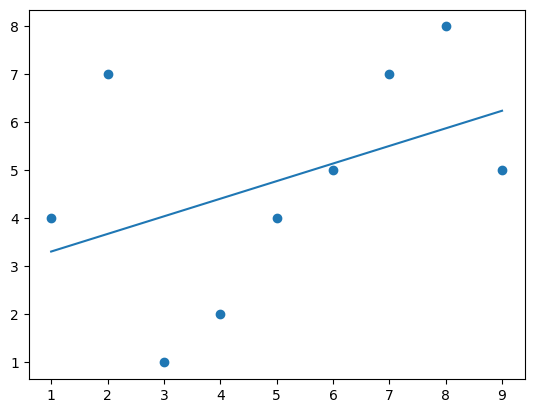

In [110]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9]
y = [4,7,1,2,4,5,7,8,5]

def slr(x):
    return slope * x + intercept

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x,y)

model = list(map(slr, x))
plt.plot(x, model)

plt.scatter(x,y)
plt.show()

# 6. MLR

In [111]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")
print(iris)
import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# 7. SLR & MLR with Performance Metrics:

In [112]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")
print(iris)

import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)


import numpy as np

x = iris[['SepalLengthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# 8. KNN

In [113]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
y_auc = knn.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 1 2 2 1 1 2 0 1 2 0 0 1 1 0 0 2 2 1 2 2 0 1 2 2 1 1 1 1 0]

Accuracy :  0.9333333333333333
Precision :  0.9487179487179488
Recall :  0.9444444444444445
F1-SCORE :  0.9419191919191919
AUC :  0.9984309468958591


# 9. DECISION TREE

In [114]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

train = DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(y_pred)
y_auc = DT.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[0 1 2 2 1 2 0 0 0 2 1 1 1 2 0 0 1 2 1 1 1 0 2 1 0 2 0 2 1 0]

Accuracy :  0.9666666666666667
Precision :  0.9629629629629629
Recall :  0.9722222222222222
F1-SCORE :  0.9658994032395567
AUC :  0.9785353535353535


# 10. RANDOM FOREST

In [115]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

train = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(y_pred)
y_auc = RF.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 2 0 0 1 1 1 1 1 2 1 2 1 2 0 1 2 2 0 0 0 1 1 0 0 1 2 1 1 0]

Accuracy :  0.9
Precision :  0.9047619047619048
Recall :  0.8910256410256411
F1-SCORE :  0.8962962962962964
AUC :  0.9897932949403537


# 11. SVM

In [116]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn import svm
svc_cl = svm.SVC(probability=True)

train = svc_cl.fit(x_train, y_train)
y_pred = svc_cl.predict(x_test)
print(y_pred)
y_auc = svc_cl.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 1 0 0 1 2 2 1 1 0 1 0 2 0 2 2 0 2 1 1 1 0 1 2 2 0 0 0 2 1]

Accuracy :  0.9333333333333333
Precision :  0.9326599326599326
Recall :  0.9326599326599326
F1-SCORE :  0.9326599326599326
AUC :  0.9966414352379265
